## 통계기초: 단순 회귀분석 및 모델평가 (LinearRegression)

--- 단순 선형 회귀 모델 평가 ---
절편 (b0): 54.34
기울기 (b1): 2.57
평균 제곱 오차 (MSE): 11.85
결정 계수 (R-squared): 0.9524


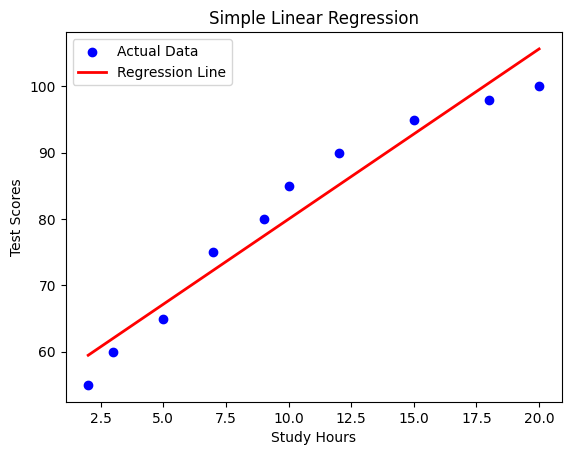

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 생성 (단순 선형 관계)
# X: 독립 변수 (공부 시간, [n_samples, 1] 형태로 reshape)
X = np.array([2, 3, 5, 7, 9, 10, 12, 15, 18, 20]).reshape(-1, 1) 
# y: 종속 변수 (시험 점수)
y = np.array([55, 60, 65, 75, 80, 85, 90, 95, 98, 100])

# 2. 데이터 분리 (학습용/테스트용)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. 모델 학습 (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train) 

# 4. 예측 및 평가
y_pred = model.predict(X_test)

# 모델 평가 지표
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- 단순 선형 회귀 모델 평가 ---")
print(f"절편 (b0): {model.intercept_:.2f}") 
print(f"기울기 (b1): {model.coef_[0]:.2f}") 
print(f"평균 제곱 오차 (MSE): {mse:.2f}") # 작을수록 좋음
print(f"결정 계수 (R-squared): {r2:.4f}") # 1에 가까울수록 좋음

# 시각화 (선택)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Study Hours")
plt.ylabel("Test Scores")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

## 이미지 분류 모델링 (ResNet)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models, datasets, transforms

# 1. 장치 설정 (GPU 사용 가능 시 GPU, 아니면 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. 데이터 전처리 정의
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 정규화
])

# 3. 데이터셋 로드 (CIFAR-10 예제)
# CIFAR-10은 10개의 클래스를 가진 이미지 데이터셋입니다.
num_classes = 10 
# (학습 데이터 로드는 생략하고, 모델 구조만 준비하겠습니다.)
# trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 4. ResNet18 모델 로드 및 수정
# 사전 학습된 (pretrained=True) ResNet18 모델 로드
model = models.resnet18(pretrained=True) 

# 전이 학습(Transfer Learning)을 위해 마지막 Fully Connected (FC) 레이어 수정
# ResNet의 FC 레이어 입력 특징 수 (512개)
num_ftrs = model.fc.in_features 
# CIFAR-10 클래스 수(10개)에 맞게 마지막 레이어 재정의
model.fc = nn.Linear(num_ftrs, num_classes) 

# 모델을 설정된 장치로 이동
model = model.to(device)

# 5. 손실 함수 및 최적화 도구 정의 (학습 준비)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

print("\n--- ResNet 모델 구조 및 학습 준비 완료 ---")
print(f"모델 이름: ResNet18 (Pretrained)")
print(f"새로 정의된 마지막 FC 레이어: {model.fc}")
print(f"손실 함수: {criterion}")
print(f"최적화 도구: {optimizer.__class__.__name__}")

# (참고: 실제 학습 코드는 데이터 로더, 반복문 등을 포함해야 합니다.)

Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jindol/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/home/jindol/envs/jindol/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jindol/envs/jindol/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.30MB/s]



--- ResNet 모델 구조 및 학습 준비 완료 ---
모델 이름: ResNet18 (Pretrained)
새로 정의된 마지막 FC 레이어: Linear(in_features=512, out_features=10, bias=True)
손실 함수: CrossEntropyLoss()
최적화 도구: SGD


## 시계열 예측 모델링 (LSTM)

In [3]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

# 1. 하이퍼파라미터 설정
input_size = 1  # 입력 특성 수 (시계열 데이터는 보통 1차원)
hidden_size = 50 # LSTM 은닉 상태 크기
num_layers = 2   # LSTM 레이어 수
output_size = 1  # 출력 특성 수 (다음 시점의 값)
seq_length = 10  # 시퀀스 길이 (몇 개의 과거 데이터로 예측할지)

# 2. LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM 레이어 정의
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # 출력 레이어 정의 (은닉 상태를 최종 예측값으로 변환)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        
        # 초기 은닉 상태와 셀 상태 (h0, c0)를 0으로 초기화
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM forward
        # out shape: (batch_size, seq_length, hidden_size)
        out, _ = self.lstm(x, (h0, c0))  
        
        # 마지막 시점의 은닉 상태만 사용하여 예측
        out = self.fc(out[:, -1, :]) 
        # out shape: (batch_size, output_size)
        return out

# 3. 모델 객체 생성 및 출력
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
print("--- LSTM 모델 구조 ---")
print(model)

# 4. 손실 함수 및 최적화 도구 정의 (학습 준비)
# 시계열 예측은 회귀 문제이므로 MSE (Mean Squared Error) 사용
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print(f"\n손실 함수: {criterion.__class__.__name__} (회귀 문제)")
print(f"최적화 도구: {optimizer.__class__.__name__}")
print(f"예상 입력 텐서 크기: (batch_size, {seq_length}, {input_size})")

# (참고: 실제 시계열 데이터 전처리 및 학습을 위해서는 Sequence Dataset 정의가 필요합니다.)

--- LSTM 모델 구조 ---
LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

손실 함수: MSELoss (회귀 문제)
최적화 도구: Adam
예상 입력 텐서 크기: (batch_size, 10, 1)
